# Is the College Football Playoff Ruining College Football?

For the only time in its 14 year history, the BCS pitted two teams from the same conference into its national championship game in the Alabama Crimson Tide and LSU Tigers in 2012. For fans of the Southeastern Conference, this was great news. Meanwhile, fanbases from outside the SEC greeted the decision with much less fanfare.

The BCS system was based completely on taking biases out of the equation, relying solely on a computer algorithm to analyze team performances and then provide rankings each week. When the decision to put Alabama and LSU into the title game was made, many wondered if it might be time to switch up how rankings were made. The BCS system had come under criticism multiple times before, but this seemed to be the last straw for many. LSU had already played (and defeated) Alabama just two months (three game weeks) earlier! Both Oklahoma State and Stanford both boasted the same 11-1 record that Alabama also had, without playing (and losing) to LSU.

Enter the College Football Playoff. Introduced for bowl season of 2015, the process completely revamped the way teams were ranked. Using computer algorithms to rank teams was no more. Now, a panel of officials (called "The Committee") gathered together each week to provide team rankings a little after the halfway point of the college football season.

With this system came an unprecedented (for Division 1A football) playoff style format, where this committee nominates four teams to receive an invite for the new College Football Playoff. The teams are put under a microscope to have their resumes reviewed closely by this committee before a decision is made. The other teams not selected, but close to the top of the ranking, are then divided into four other high-profile bowl locations, filling out the rest of the New Year's Six slate of games.

This is great news, right?!

Maybe not. With a heightened importance on being one of the top four teams to make the playoff, college football started to notice some trends. Star players seemingly would opt out of bowl games more frequently and, in some cases during mid-season, if their team had no chance of being one of those "golden" four teams. After a while, it even appeared that only a handful of the same programs were being voted into the Playoff every year.

So, with that being said, it prompts this question: ***Is the College Football Playoff actually ruining college football?***

Read on to find out!

##### Data Sources

I would like to quickly note the data sources I am using for this project.

For the players and recruits, I retrieved this data from the site CollegeFootballData.com. However, the recruit ratings themselves are from the site 247Sports.com, where they use a rating metric called the 247Sports Composite. The composite takes into account ratings from three player evaluation sites (Rivals.com, ESPN and 247Sports' own ratings), and combines those three ratings into one, which is what you see below in the columns "stars" and "rating." Using the composite ratings for this data is great because it provides a metric that takes more than one opinion on player evaluation into account.

The data used for season records and playoff appearances are both also from the site CollegeFootballData.com.

The TV ratings data is from the site sportsmediawatch.com.

In [1]:
#importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #setting seaborn theme

#reading file

data = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/Recruiting Database.csv', encoding = 'Latin1')

#verifying read file

data.head()

,id,athleteId,recruitType,year,ranking,name,school,committedTo,position,height,weight,stars,rating,city,stateProvince,country,hometownInfo.latitude,hometownInfo.longitude,hometownInfo.fipsCode
0,61569,4428988.0,HighSchool,2020,1,Bryan Bresee,Damascus,Clemson,DT,77.0,290.0,5,0.9995,Damascus,MD,USA,39.288438,-77.203872,24031.0
1,61570,4685720.0,HighSchool,2020,2,Bryce Young,Mater Dei,Alabama,DUAL,71.0,183.0,5,0.9994,Santa Ana,CA,USA,33.749495,-117.873221,6059.0
2,61571,4430800.0,HighSchool,2020,3,Julian Fleming,Southern Columbia,Ohio State,WR,74.0,199.0,5,0.9979,Catawissa,PA,USA,40.954827,-76.460987,42037.0
3,61572,4428992.0,HighSchool,2020,4,Kelee Ringo,Saguaro,Georgia,CB,74.0,205.0,5,0.9976,Scottsdale,AZ,USA,33.494219,-111.926018,4013.0
4,61573,4428994.0,HighSchool,2020,5,Arik Gilbert,Marietta,LSU,TE,77.0,253.0,5,0.9972,Marietta,GA,USA,33.952847,-84.549615,13067.0


In [2]:
##cleaning data

#remove unneeded columns

data = data.drop(['id', 'athleteId', 'recruitType', 'school', 'height', 'weight', 'city', 'stateProvince',
                 'country', 'hometownInfo.latitude', 'hometownInfo.longitude', 'hometownInfo.fipsCode'], axis=1)

#renaming columns for ease

data = data.rename(columns={'committedTo':'college'})

#previewing clean data

data.head()

,year,ranking,name,college,position,stars,rating
0,2020,1,Bryan Bresee,Clemson,DT,5,0.9995
1,2020,2,Bryce Young,Alabama,DUAL,5,0.9994
2,2020,3,Julian Fleming,Ohio State,WR,5,0.9979
3,2020,4,Kelee Ringo,Georgia,CB,5,0.9976
4,2020,5,Arik Gilbert,LSU,TE,5,0.9972


Throughout our analysis, we are going to set our year range from 2011 to 2021. By choosing 2011, this allows us to detect recruiting, TV viewership and season records trends for a few seasons before the College Football Playoff was introduced, as well as every year during the CFP era.

In [3]:
#setting year to 2011 or greater

data = data[data['year'] >= 2011]

#removing uncommitted players

data = data[data['college'].notnull()]

## Setting Elite Group

To kick off the recruiting analysis, we must first set an "elite" teams group. As mentioned earlier, it seemed like it was always the same programs receiving invitations to the Playoff every year.

To provide more accurate analysis, we will examine season records data to retrieve winning percentages as well as playoff and national championship game appearances from 2011 to 2021 to create criteria and set our elite teams group.

Inclusion into the elite group will be based on the following analysis in this section, but only in regards to the *College Football Playoff era.* We will analyze the final four years of the BCS era to make note of anything interesting we might find.

In [4]:
#reading files

records = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/CFB Season Records.csv', encoding='Latin1')
postseason = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/CFB Championship Database.csv')

records.head()

,year,team,conference,division,total.games,total.wins,total.losses,total.ties,conferenceGames.games,conferenceGames.wins,conferenceGames.losses,conferenceGames.ties,homeGames.games,homeGames.wins,homeGames.losses,homeGames.ties,awayGames.games,awayGames.wins,awayGames.losses,awayGames.ties
0,2020,Air Force,Mountain West,Mountain,6,3,3,0,4,2,2,0,3,2,1,0,3,1,2,0
1,2020,Akron,Mid-American,East,6,1,5,0,6,1,5,0,3,1,2,0,3,0,3,0
2,2020,Alabama,SEC,West,13,13,0,0,11,11,0,0,5,5,0,0,5,5,0,0
3,2020,Appalachian State,Sun Belt,NaN,12,9,3,0,8,6,2,0,6,5,1,0,5,3,2,0
4,2020,Arizona,Pac-12,South,5,0,5,0,5,0,5,0,3,0,3,0,2,0,2,0


In [5]:
#cleaning records data

records = records.drop(['division', 'conferenceGames.games', 'conferenceGames.wins', 'conferenceGames.losses',
                       'conferenceGames.ties', 'homeGames.games', 'homeGames.wins', 'homeGames.losses',
                       'homeGames.ties', 'awayGames.games', 'awayGames.wins', 'awayGames.losses',
                       'awayGames.ties'], axis=1)

records = records.rename(columns={'total.games':'games', 'total.wins':'W', 'total.losses':'L', 'total.ties':'T'})

#settings records year from 2011 to 2021

records = records[records['year'] >= 2010]

records.head()

,year,team,conference,games,W,L,T
0,2020,Air Force,Mountain West,6,3,3,0
1,2020,Akron,Mid-American,6,1,5,0
2,2020,Alabama,SEC,13,13,0,0
3,2020,Appalachian State,Sun Belt,12,9,3,0
4,2020,Arizona,Pac-12,5,0,5,0


In [6]:
##cleaning postseason data

#setting year from 2011 to 2021 (postseason bowl year of 2011, listed as 2010 in data set)

postseason = postseason[postseason['Year'] >= 2010]

postseason.head()

,Team,Game Reached,Champion?,Year,Era
18,Auburn,Final,Yes,2010,BCS
19,Oregon,Final,No,2010,BCS
20,Alabama,Final,Yes,2011,BCS
21,LSU,Final,No,2011,BCS
22,Alabama,Final,Yes,2012,BCS


##### Playoff and Championship Game Appearances

Let's start by analyzing BCS national championship game appearances. This is from the year range 2011-2014.

In [7]:
#displaying BCS appearances

bcs_app = postseason[postseason['Year'] <= 2013]

print('BCS Championship Game Appearances: 2011-2014')
bcs_app.Team.value_counts()

BCS Championship Game Appearances: 2011-2014


Alabama          2
Auburn           2
Oregon           1
Florida State    1
LSU              1
Notre Dame       1
Name: Team, dtype: int64

It appears that only Alabama and Auburn had multiple title game appearances during our analyzed BCS era. Let's move on to College Football Playoff appearances.

In [8]:
cfp = postseason[postseason['Year'] >= 2014]

#displaying CFP appearances

print('College Football Playoff Appearances: 2014-2021')
cfp.Team.value_counts()

College Football Playoff Appearances: 2014-2021


Clemson           6
Alabama           6
Oklahoma          4
Ohio State        4
Notre Dame        2
LSU               1
Washington        1
Georgia           1
Oregon            1
Florida State     1
Michigan State    1
Name: Team, dtype: int64

The only teams with multiple playoff appearances during the CFP era are Alabama, Clemson, Oklahoma, Ohio State, and Notre Dame. While those five schools do have multiple appearances, this provides a strong resume builder for all of the programs not named Notre Dame, with at least four appearances each.

Now let's analyze College Football Playoff championship game appearances.

In [9]:
#displaying CFP final appearances

cfp_final = cfp[cfp['Game Reached'] == 'Final']

print('College Football Playoff Championship Game Appearances: 2014-2021')
cfp_final.Team.value_counts()

College Football Playoff Championship Game Appearances: 2014-2021


Alabama       5
Clemson       4
Ohio State    2
Oregon        1
LSU           1
Georgia       1
Name: Team, dtype: int64

Making it to the playoff on its own is no doubt difficult. However, winning a playoff game and advancing to the national championship game is even harder. While we don't want to discount the accomplishments Georgia, Oregon and LSU have here (LSU even won a national title in 2020), this strengthens the argument to be made for Alabama, Clemson, and Ohio State to be included in the elite group again.

##### Win Percentages

Let's now switch gears and find win percentages in both our BCS sample group and the entire College Football Playoff era.

In [10]:
#getting BCS sample size win percentages

records['win_pct'] = round((records.W)/(records.games),2)

bcs = records[records['year'] <= 2013]
cfp = records[records['year'] >= 2014]

bcs_group = bcs.groupby('team').agg(np.mean)['win_pct']

bcs_group = round(bcs_group.sort_values(ascending=False),3)

print('BCS Sample Win Percentages: 2011-2014')
print(bcs_group.head(10))

BCS Sample Win Percentages: 2011-2014
team
Oregon               0.888
Alabama              0.868
Stanford             0.855
LSU                  0.830
Boise State          0.828
Northern Illinois    0.825
Florida State        0.815
Oklahoma             0.812
Ohio State           0.810
South Carolina       0.798
Name: win_pct, dtype: float64


What I found most interesting in this section is how one program in particular is missing: Clemson. I will follow back on this point shortly, but I wanted to highlight that point here real quick.

We will now analyze the win percentages of programs in the College Football Playoff era, which will factor into deciding who our elite teams will be.

In [11]:
#getting CFP win percentages

cfp_group = cfp.groupby('team').agg(np.mean)['win_pct']

cfp_group = round(cfp_group.sort_values(ascending=False),3)

print('College Football Playoff Era Win Percentages: 2015-2021')
print(cfp_group.head(10))

College Football Playoff Era Win Percentages: 2015-2021
team
Alabama              0.919
Ohio State           0.900
Clemson              0.893
Oklahoma             0.817
Georgia              0.783
Boise State          0.779
Appalachian State    0.774
Wisconsin            0.740
Notre Dame           0.727
Memphis              0.716
Name: win_pct, dtype: float64


Clemson certainly made its presence known here. In the last subset of analysis, I mentioned that they were missing completely during the four year BCS sample in top winning percentages. Here, they boast the third highest win percentage overall, winning an outstanding 89% of their games. After appearing in the 2016 national title game, and winning the title games in 2017 and 2019, the program certainly took full advantage of the momentum that came with these accomplishments.

On the other hand, Oregon was at the top of the BCS sample winning percentage list and yet is nowhere in the top 10 of the CFP winning percentage list. Sure, Oregon's program may have suffered from losing head coach Chip Kelly to the NFL, but they also lost momentum from not making a playoff appearance since 2015. *Both the Clemson and Oregon points are arguments that can support how the College Football Playoff might be ruining college football.*

Again, our elite group will be comprised of teams who have performed well during the **span of the College Football Playoff.** Looking at the win percentages during the CFP era, only four teams have a win percentage above 80%: Alabama, Clemson, Ohio State and Oklahoma. These teams were also the only four teams who had more than two CFP appearances.

For those reasons, our elite group will consist of Alabama, Clemson, Ohio State and Oklahoma.

In [12]:
#setting elite group

elites = ['Alabama', 'Clemson', 'Ohio State', 'Oklahoma']

data['eliteLevel'] = ''

data['eliteLevel'] = np.where(data.college.isin(elites), 'Elite', 'Non-Elite')
#adding Elite or Non-Elite to commit by school

In [13]:
data.head() #previewing file

,year,ranking,name,college,position,stars,rating,eliteLevel
0,2020,1,Bryan Bresee,Clemson,DT,5,0.9995,Elite
1,2020,2,Bryce Young,Alabama,DUAL,5,0.9994,Elite
2,2020,3,Julian Fleming,Ohio State,WR,5,0.9979,Elite
3,2020,4,Kelee Ringo,Georgia,CB,5,0.9976,Non-Elite
4,2020,5,Arik Gilbert,LSU,TE,5,0.9972,Non-Elite


## Blue Chip Prospect Recruiting

In our first section of recruiting analysis, we will start by analyzing blue chip prospect recruiting during our time frame. A **blue chip prospect** is a player who is rated with either 4 or 5 stars as a prospect. These players are highly sought after by programs all around the country due to their talent levels.

To perform this analysis, we will filter out any players who are not rated as a 4 or 5 star in the 247Sports Composite rankings. Then, we will group the players by their graduation year and create a percentage of blue chip prospect commitments both the elite and non-elite groups received relative to the total pool of blue chip prospects each class year.

The results of this analysis can be viewed in the graph at the bottom of this section, along with numbers for reference.

In [14]:
#filtering to blue chip recruits

blue_chips = data[data['stars'] >= 4]

#grouping by eliteLevel

bchip_group = blue_chips.groupby(['year', 'eliteLevel'])['eliteLevel'].count().rename('count')

#getting percentage by year

bchip_percent = bchip_group / bchip_group.groupby('year').sum() * 100
bchip_percent = round(bchip_percent,2)
bchip_percent = bchip_percent.reset_index()

In [44]:
#providing numbers with graph

bchip_percent

,year,eliteLevel,count
0,2011,Elite,16.61
1,2011,Non-Elite,83.39
2,2012,Elite,14.51
3,2012,Non-Elite,85.49
4,2013,Elite,16.00
5,2013,Non-Elite,84.00
6,2014,Elite,16.47
7,2014,Non-Elite,83.53
8,2015,Elite,15.92
9,2015,Non-Elite,84.08


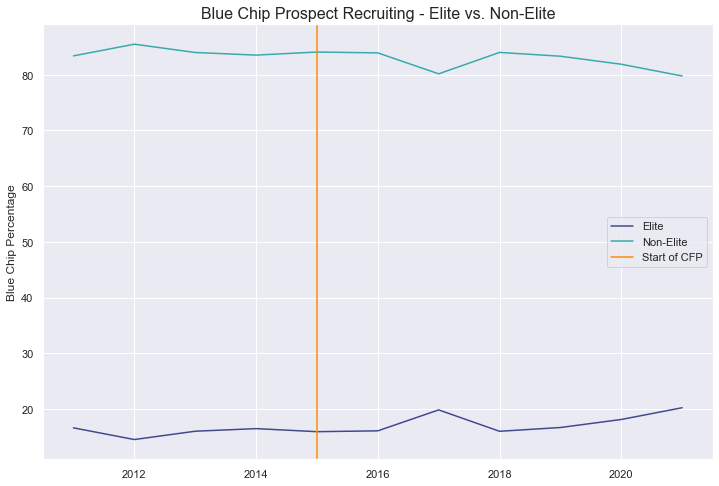

In [15]:
#plotting results

sns.set_theme() #setting theme

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='year', y='count', data=bchip_percent, hue='eliteLevel', palette='mako')
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.title('Blue Chip Prospect Recruiting - Elite vs. Non-Elite', fontsize=16)
plt.xlabel('')
plt.ylabel('Blue Chip Percentage', fontsize=12)
plt.legend()
plt.show()

As evidenced in the graph above, the blue chip recruiting percentages seemed to stay pretty consistent, give or take a small adjustment, each year during the BCS sample size. It continued to stay this way during the first two class years of the CFP era.

In a way, this can be expected. The College Football Playoff, as new as it was during those years, needed some time to "play out" before changes could start to take place in recruiting. For future reference, we will call this the "two year cushion" to account for the change in system. The impact it had on recruits did take a couple years, but we start to notice the two lines come closer together with each new recruiting class year. This means that more blue chip recruits are starting to place their commitments to one of the four programs in our elite group, with the elite group gaining a commitment from 20% or more of the total blue chip prospect pool for the first time in 2021.

## Five Star Prospect Recruiting

Next, we will analyze the impact the College Football Playoff has had on recruiting five star talent. Self-explanatory, a five star prospect is a high school or junior college player who is rated with five stars in the recruiting ratings. Even though 4 star prospects are recruited well, 5 star prospects are recruited the hardest because of their elite level of talent that they can provide a program.

We will perform analysis in a similar way to how we did in the blue chip section. To start, we will filter for players who are only 5 star recruits. From there, we will group by year (class) and elite level, then create a percentage for both elite and non-elite groups for how many commitments they gained from 5 stars in regards to the entire 5 star talent pool for that class.

In [17]:
#filtering for five stars

five_stars = data[data['stars'] == 5]

#grouping

group_5 = five_stars.groupby(['year', 'eliteLevel'])['eliteLevel'].count().rename('count')

#getting percentage by year

percent_5 = group_5 / group_5.groupby('year').sum() * 100
percent_5 = round(percent_5, 2)
percent_5 = percent_5.reset_index()

In [46]:
#providing numbers for reference

percent_5

,year,eliteLevel,count
0,2011,Elite,33.33
1,2011,Non-Elite,66.67
2,2012,Elite,13.51
3,2012,Non-Elite,86.49
4,2013,Elite,28.57
5,2013,Non-Elite,71.43
6,2014,Elite,24.24
7,2014,Non-Elite,75.76
8,2015,Elite,27.03
9,2015,Non-Elite,72.97


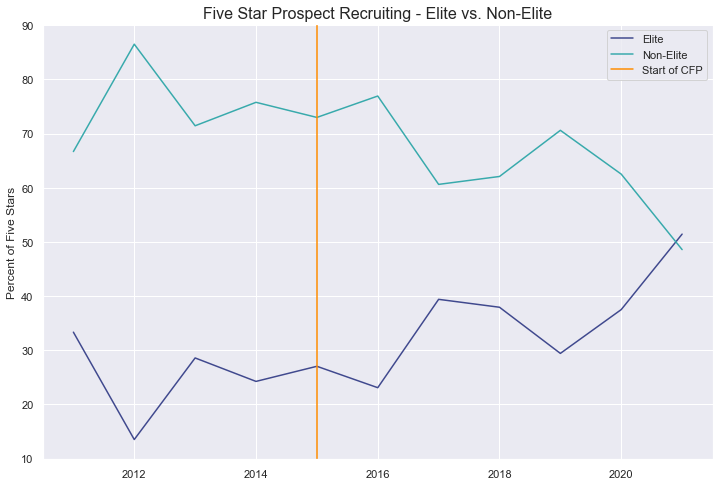

In [18]:
#plotting results

fig = plt.figure(figsize=(12,8))
sns.lineplot(x='year', y='count', data=percent_5, hue='eliteLevel', palette='mako')
plt.title('Five Star Prospect Recruiting - Elite vs. Non-Elite', fontsize=16)
plt.xlabel('')
plt.ylabel('Percent of Five Stars', fontsize=12)
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.legend()
plt.show()

This is a very interesting result. Based on the graph above, before the creation of the College Football Playoff, the elite group only broke the 30% mark once (2011) for 5 star recruits. Once the CFP was created, and given the two year cushion mentioned earlier to adjust to the change, the elite group only finished **below** 30% of 5 star commitment percentage once (2019).

Perhaps the most interesting (and absurd) point we can take from the graph above is in the 2021 class. ***The elite group actually managed to recruit more 5 star recruits than the entire non-elite group in 2021!*** Don't forget, the non-elite group consists of some very good football programs who also recruit well, such as Georgia, LSU, Notre Dame, and Penn State, to name a few. This provides another point to be made for how the College Football Playoff might actually be doing more harm than good for college football.

## Average Recruit Rating by Group

To finish off our recruiting analysis, let's take a look at the average recruit rating of each group by class year.

To do this, we will first filter out any schools who are not in a Power 5 conference. Schools in a Power 5 conference are a member of one of five conferences, which are the SEC, Big Ten, ACC, Pac-12 and Big 12. These schools usually perform better, and receive much more funding, than schools in other conferences.

So, in order to make this section of the recruiting analysis more even, we will filter out any programs not in a Power 5 conference. Then, we will again group by elite and non-elite group, take the average of each group by class year, and graph it below.

In [19]:
avg = data.copy()

records_2 = records.copy()

#list of power 5 conferences

power_5_list = ['Big Ten', 'SEC', 'ACC', 'Pac-12', 'Big 12']

#filtering out other conferences

conf_filter = records_2.conference.isin(power_5_list)
records_2 = records_2[conf_filter]

teams = avg.college.isin(records_2.team)
avg = avg[teams]

(16102, 8)

In [20]:
group_avg = avg.groupby(['year', 'eliteLevel'])['rating'].agg(np.mean).rename('rating')
group_avg = group_avg.reset_index()

In [45]:
#providing numbers for recruit ratings

round(group_avg,3)

,year,eliteLevel,rating
0,2011,Elite,0.898
1,2011,Non-Elite,0.850
2,2012,Elite,0.912
3,2012,Non-Elite,0.857
4,2013,Elite,0.906
5,2013,Non-Elite,0.853
6,2014,Elite,0.906
7,2014,Non-Elite,0.852
8,2015,Elite,0.901
9,2015,Non-Elite,0.858


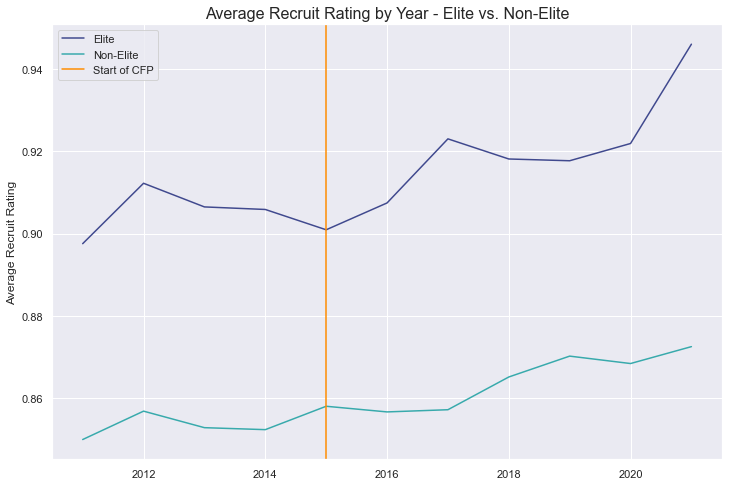

In [21]:
fig = plt.figure(figsize=(12,8))

sns.lineplot(x='year', y='rating', data=group_avg, hue='eliteLevel', palette='mako')
plt.title('Average Recruit Rating by Year - Elite vs. Non-Elite', fontsize=16)
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.xlabel('')
plt.ylabel('Average Recruit Rating', fontsize=12)
plt.legend()
plt.show()

To start, let's note that both groups managed to trend upward in their average recruit rating numbers after the creation of the College Football Playoff. This is the only time in our recruit analysis that both teams had an upward trajectory.

However, the difference in these upward trajectories is...vastly different. The non-elite group managed to hover around 0.87 in the last 3 years of our analysis at their highest. The elite group, on the other hand, never finished below 0.90 starting with the 2012 class year. They were trending back toward the 0.90 mark during the 2015 season, which ironically is the same year as the creation the College Football Playoff. After that, though, their average recruit rating skyrocketed, eventually reaching a ridiculous mark of 0.946. Again, the ***average recruit*** for four teams in 2021 was rated at 0.946.

I don't expect that trend to continue in future classes, but if the elite group still manages to hover around an average recruit rating of 0.92 to 0.93, that doesn't help open the door for other teams to gain invites to the playoff.

## Bowl Game TV Viewership and College Football Playoff

Another area we can analyze the College Football Playoff's impact on college football is with television ratings and viewership numbers.

With three annual playoff games (two semifinal games and one championship game), along with four other major bowl games tabbed the New Year's Six, does this help to increase interest and viewership on these games? Does it hurt viewership for the other non-playoff bowl games since they aren't as significant to a national audience?

Let's find out!

In [23]:
#reading file

tv_ratings = pd.read_csv('C:/Users/Ryan/Desktop/Python/CFB Analysis/Bowl Game Viewership.csv')

#filtering to 2011

tv_ratings = tv_ratings[tv_ratings['Year'] >= 2011]

tv_ratings

,Bowl,Team 1,Team 2,Rating,Viewers,Year,Playoff?,Era
0,CFPNC,Alabama,Ohio State,10.3,18.653,2021,Final,CFP
1,Sugar,Ohio State,Clemson,9.8,19.149,2021,Semi,CFP
2,Rose,Alabama,Notre Dame,9.6,18.893,2021,Semi,CFP
3,Peach,Georgia,Cincinnati,4.9,8.727,2021,No,CFP
4,Orange,Texas A&M,North Carolina,4.3,7.577,2021,No,CFP
...,...,...,...,...,...,...,...,...
64,BCSNC,Auburn,Oregon,15.3,27.316,2011,Final,BCS
65,Rose,TCU,Wisconsin,11.3,20.558,2011,No,BCS
66,Sugar,Ohio State,Arkansas,8.2,13.635,2011,No,BCS
67,Fiesta,Oklahoma,UConn,6.2,10.819,2011,No,BCS


##### TV Ratings and Viewership for National Championship Games

First, let's analyze the TV ratings and viewership data for national championship games from the BCS era in 2011-2014, and also every national championship game that has taken place so far in the College Football Playoff.

In [24]:
#start with final game viewership (remember to denote viewers is in millions)

finals = tv_ratings[tv_ratings['Playoff?'] == 'Final']

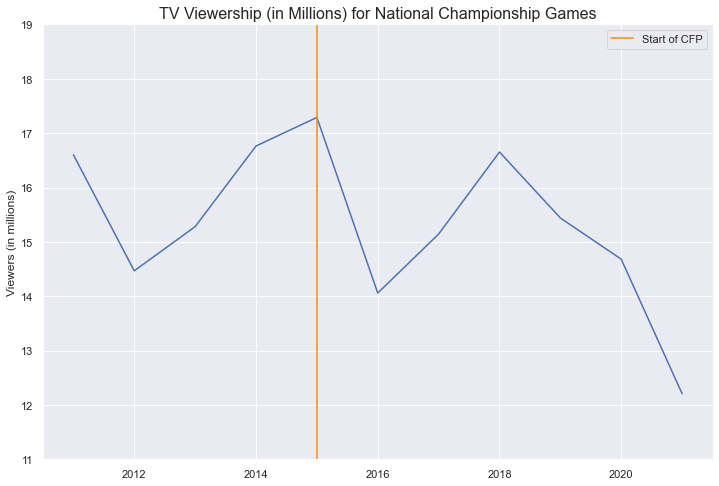

In [25]:
#plot results

fig = plt.figure(figsize=(12,8))

sns.lineplot(x='Year', y='Viewers', data=tv_ratings, ci=None)
plt.title('TV Viewership (in Millions) for National Championship Games', fontsize=16)
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.xlabel('')
plt.ylabel('Viewers (in millions)', fontsize=12)
plt.ylim(11,19)
plt.legend()
plt.show()

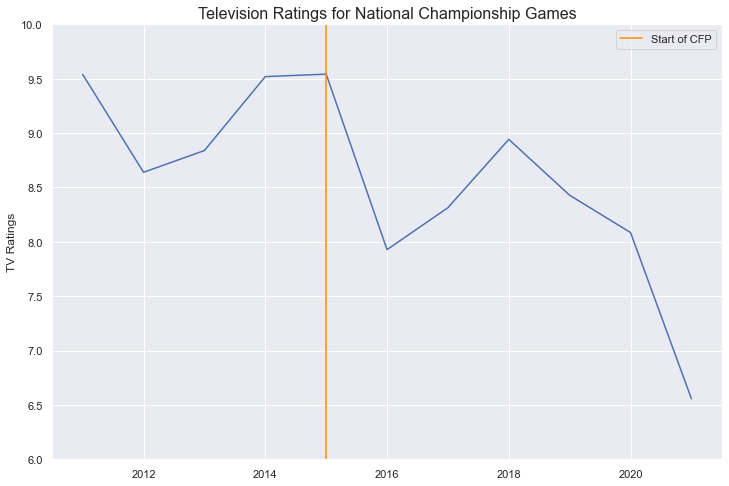

In [26]:
#plot ratings

fig = plt.figure(figsize=(12,8))

sns.lineplot(x='Year', y='Rating', data=tv_ratings, ci=None)
plt.title('Television Ratings for National Championship Games', fontsize=16)
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.xlabel('')
plt.ylabel('TV Ratings', fontsize=12)
plt.ylim(6,10)
plt.legend()
plt.show()

A quick note before reviewing the results. For these graphs and the ones that follow, the ratings and viewership may look very similar. However, there are still some differences between the two and believe it is worth analyzing both.

Now for the review of this section. We do notice a trend of both ratings and viewership dropping off after the first CFP national title game. It is expected that the highest point on this graph came during the first CFP national title game. The whole process was brand new, and that was sure to draw viewers and bring in ratings.

However, the drop off is significant in 2021, which marks the lowest point in both categories by a wide margin. The reason for this could be that having the same programs in the playoff every year was beginning to make it "stale" in the eyes of viewers.

##### TV Ratings and Viewership for Semifinal Playoff Games

Next, let's analyze the ratings and viewership data for semifinal playoff games.

To do this, we will group the semifinal games together by year and take the sum of both their ratings and viewership numbers and chart them as shown below.

In [27]:
semis = tv_ratings[tv_ratings['Playoff?'] == 'Semi']

In [28]:
semis_grouped = semis.groupby('Year').agg(np.sum)
semis_grouped = semis_grouped.reset_index()

In [29]:
semis_grouped

,Year,Rating,Viewers
0,2015,30.0,56.435
1,2016,18.7,34.371
2,2017,20.5,38.581
3,2018,25.1,48.386
4,2019,19.3,35.878
5,2020,20.6,38.365
6,2021,19.4,38.042


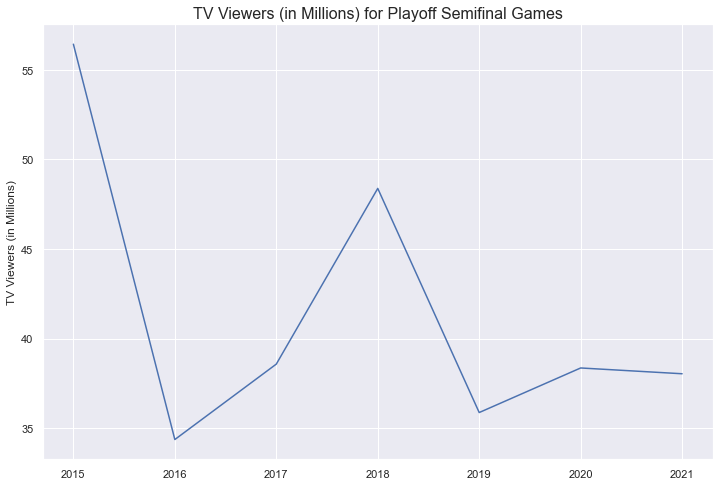

In [30]:
#plot viewers

fig = plt.figure(figsize=(12,8))

sns.lineplot(x='Year', y='Viewers', data=semis_grouped, ci=None)
plt.title('TV Viewers (in Millions) for Playoff Semifinal Games', fontsize=16)
plt.xlabel('')
plt.ylabel('TV Viewers (in Millions)', fontsize=12)
plt.show()

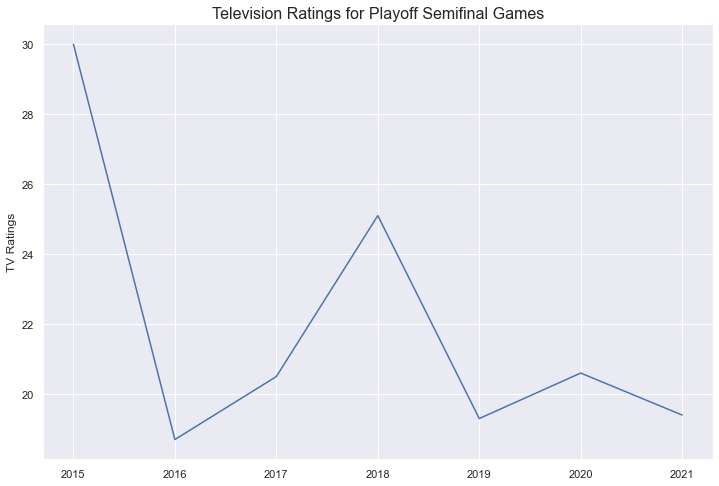

In [31]:
#plotting ratings

fig = plt.figure(figsize=(12,8))

sns.lineplot(x='Year', y='Rating', data=semis_grouped, ci=None)
plt.title('Television Ratings for Playoff Semifinal Games', fontsize=16)
plt.xlabel('')
plt.ylabel('TV Ratings', fontsize=12)
plt.show()

We don't have a CFP line in these two graphs because there were no semifinal games in the BCS era, only a national championship game.

These results are very reflective of the national championship game results from earlier. Again, it is expected that ratings and viewership would be at an all time high in 2015. The process of a playoff in college football was unprecedented, surely drawing excitement with it. After a slight upward trend in 2017 and 2018, the numbers dropped back down again. This could also be due to a lack of interest in watching the semifinal games if it seems like the same programs are the only ones receiving playoff invites every year.

##### TV Ratings and Viewership for New Year's Six, Non-Playoff Games

To finish off our television data analysis, let's examine the numbers regarding the other major bowl games that are non-playoff games in the remaining New Year's Six bowls.

Much like our semifinal analysis, we will group the non-playoff bowl games by year and add up their ratings and viewership numbers respectively.

In [32]:
#filtering

non_playoff = tv_ratings[tv_ratings['Playoff?'] == 'No']

#grouping

non_playoff_grouped = non_playoff.groupby('Year').agg(np.sum)
non_playoff_grouped = non_playoff_grouped.reset_index()

In [33]:
non_playoff_grouped

,Year,Rating,Viewers
0,2011,32.4,55.694
1,2012,29.2,48.124
2,2013,29.1,50.017
3,2014,32.8,57.610
4,2015,18.2,30.440
5,2016,21.8,37.855
6,2017,23.5,42.158
7,2018,21.9,39.739
8,2019,25.9,46.916
9,2020,21.7,38.815


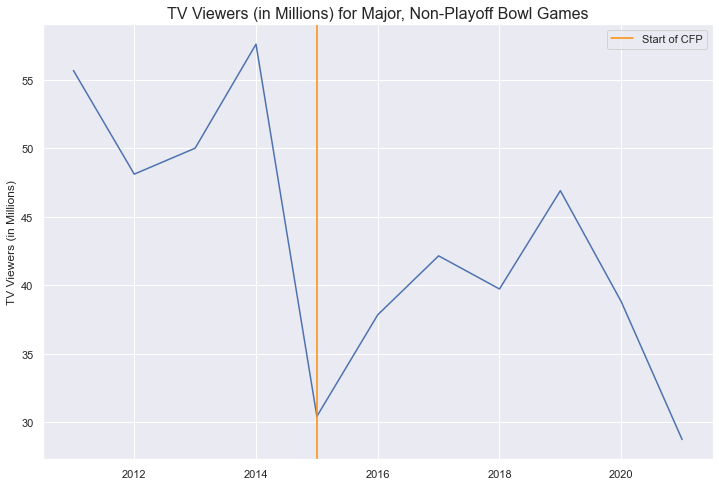

In [34]:
#plotting tv viewership

fig = plt.figure(figsize=(12,8))

sns.lineplot(x='Year', y='Viewers', data=non_playoff_grouped, ci=None)
plt.title('TV Viewers (in Millions) for Major, Non-Playoff Bowl Games', fontsize=16)
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.xlabel('')
plt.ylabel('TV Viewers (in Millions)', fontsize=12)
plt.legend()
plt.show()

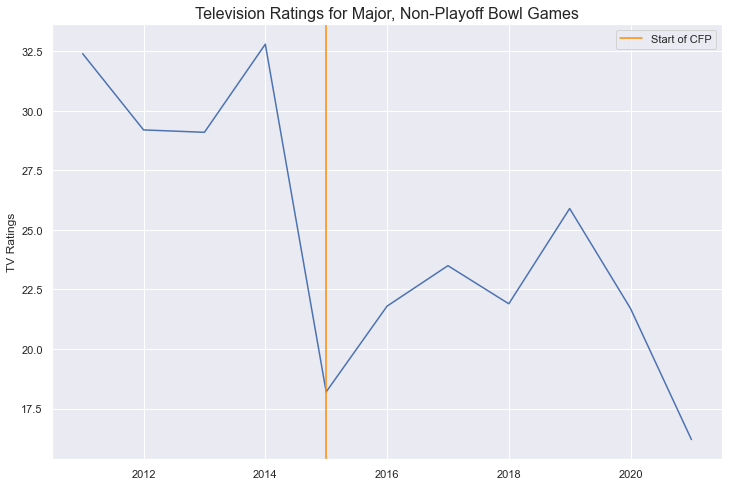

In [35]:
#plotting ratings

fig = plt.figure(figsize=(12,8))

sns.lineplot(x='Year', y='Rating', data=non_playoff_grouped, ci=None)
plt.title('Television Ratings for Major, Non-Playoff Bowl Games', fontsize=16)
plt.axvline(2015, color='darkorange', label='Start of CFP')
plt.xlabel('')
plt.ylabel('TV Ratings', fontsize=12)
plt.legend()
plt.show()

These results are interesting. The viewership for other major bowl games was very high during the BCS era. It didn't appear that viewers cared all that much if these bowl games weren't as meaningful as playoff or championship game.

Where it gets real interesting is in 2015. The viewership and ratings numbers both plummeted significantly. While numbers trended upward through 2019, the numbers again fell starting in 2020 and fell to an all time low in 2021.

The drop in 2015 and the all time low mark in 2021 also support the argument that the College Football Playoff is ruining college football. Fans of the game don't appear to care about the other major bowl games if they aren't playoff games, unless the team they support is playing in it.

## Conclusion

The argument that the College Football Playoff is ruining college football is strong after reviewing the data above.

From a recruiting perspective, elite talent is becoming more likely to commit to one of four programs in Alabama, Clemson, Ohio State or Oklahoma with every class year. This case is especially true in regards to five star talent. When only four programs manage to outrecruit every other program ***combined*** for five star commitments, as was the case in 2021, could signify the start of a major problem. This statement aided by the fact that the average recruit of those four schools was a full seven points higher than every other Division I program in the most recent class cycle in 2021 only shines a spotlight on an already troubling trend in the game.

I do understand that stars and ratings don't always matter when a prospect enrolls in their school of choice, and that player development does play a large role to help bring the best out of a player. However, programs are more likely to benefit from gaining signatures from elite talent year after year than if they don't attract this talent.

Looking at the television side of things, it appears that fans are also starting to take note of this trend. Viewers seemed less enthusiastic to tune in to watch any postseason bowl games in recent years. When those same four teams mentioned above have appeared in ***more than half*** of the playoff seasons, fans of the game are becoming disinterested in seeing the same teams every year. This was not the case during the final four years of the BCS, where ratings were way up for games that were not the national championship game.

While the idea of adding two teams to play for a national title seemed like a great idea at the time, the importance the College Football Playoff has placed on being one of the top four teams might be slowly starting to ruin the game from both the recruiting and fanbase perspectives.